In [1]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from statsmodels.stats.proportion import proportions_ztest

## Setup

In [2]:
# Load annotation (S-phase label & clone)
df = pd.read_csv('../annotation/annotation_mESC/nuclei_mESC_sphase_all.tsv', sep='\t')

# Load embeddings and center
embeddings_arr = np.load('embeddings/embeddings_BYOL_mESC_all.npy', allow_pickle=True)
scaler = StandardScaler(with_mean=True, with_std=False)
X_centered = scaler.fit_transform(embeddings_arr)

# Run PCA
pca = PCA(n_components=2, random_state=42)
X_emb = pca.fit_transform(X_centered)

## PC1>50
- Bar plots
- Statistics

In [3]:
# PC1
PC = X_emb[:, 0]
thresh = 50                    
plot_name = f'PC1>{thresh}'

# Subset dataframe for nuclei
thresh_indices = np.where(PC > thresh)
dfThresh = df.iloc[thresh_indices]
dfAll = df.copy()

### Bar plots

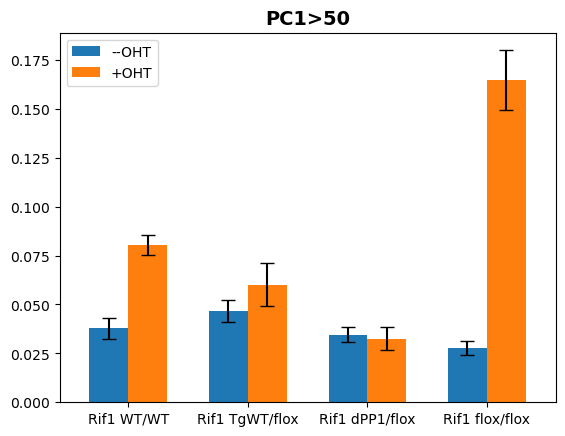

In [4]:
# Order genotypes
genotypes_ordered = ['Rif1 WT/WT', 'Rif1 WT/WT (+OHT)', 'Rif1 TgWT/flox', 'Rif1 TgWT/-', 
                     'Rif1 dPP1/flox', 'Rif1 dPP1/-', 'Rif1 flox/flox', 'Rif1 -/-']
minus_OHT_indices, plus_OHT_indices = [0, 2, 4, 6], [1, 3, 5, 7]

# Obtain number and proportion of nuclei (ordered by genotype)
thresh_counts = dfThresh['genotype'].value_counts().sort_index().reindex(index=genotypes_ordered)
all_counts = dfAll['genotype'].value_counts().sort_index().reindex(index=genotypes_ordered)
thresh_prop = thresh_counts/all_counts

# Calculate 95% confidence interval
ci_95 = 1.96 * (((thresh_prop * (1 - thresh_prop))/all_counts)**0.5)

# Subset by minus/plus OHT
thresh_minus_OHT = thresh_prop[minus_OHT_indices]
thresh_plus_OHT = thresh_prop[plus_OHT_indices]
ci_95 = [ci_95[minus_OHT_indices].values, ci_95[plus_OHT_indices].values]

# Create dataframe for plotting
dfTest = pd.DataFrame(thresh_plus_OHT.values, thresh_minus_OHT.values).reset_index()
dfTest.index = thresh_minus_OHT.index                               
dfTest.columns = ['--OHT', '+OHT']

# Plot
dfTest.plot.bar(yerr=ci_95, capsize=5, width=0.65)
plt.title(plot_name, fontsize=14, fontweight='bold')
plt.xticks(rotation=0);

### Statistics

In [5]:
# Statistics (Two-proportion Z-test)
for name, (index_minus_OHT, index_plus_OHT) in enumerate(zip(minus_OHT_indices, plus_OHT_indices)):
    x1, x2 = thresh_counts[index_minus_OHT], thresh_counts[index_plus_OHT] 
    n1, n2 = all_counts[index_minus_OHT], all_counts[index_plus_OHT] 
    z, p = proportions_ztest(count=np.array([x1, x2]), nobs=np.array([n1, n2]), alternative='two-sided')
    print(thresh_minus_OHT.index[name])
    print(f'Z = {z:.4f}, p-value = {p:.1e}\n')

Rif1 WT/WT
Z = -9.8322, p-value = 8.2e-23

Rif1 TgWT/flox
Z = -2.2583, p-value = 2.4e-02

Rif1 dPP1/flox
Z = 0.5455, p-value = 5.9e-01

Rif1 flox/flox
Z = -24.6900, p-value = 1.4e-134



## PC2>15
- Bar plots
- Statistics

In [6]:
# PC2
PC = X_emb[:, 1]
thresh = 15                     
plot_name = f'PC2>{thresh}'

# Subset dataframe for thresh nuclei
thresh_indices = np.where(PC > thresh)
dfThresh = df.iloc[thresh_indices]
dfAll = df.copy()

### Bar plots

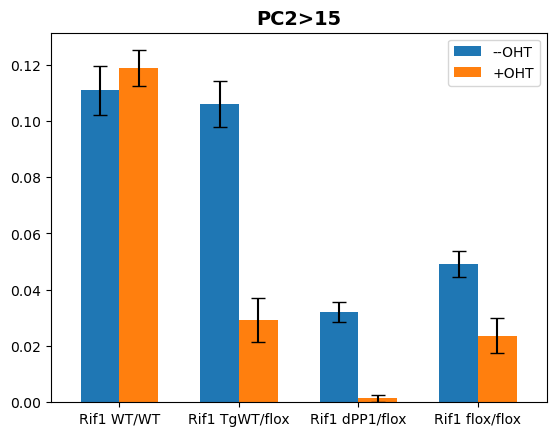

In [7]:
# Order genotypes
genotypes_ordered = ['Rif1 WT/WT', 'Rif1 WT/WT (+OHT)', 'Rif1 TgWT/flox', 'Rif1 TgWT/-', 
                     'Rif1 dPP1/flox', 'Rif1 dPP1/-', 'Rif1 flox/flox', 'Rif1 -/-']
minus_OHT_indices, plus_OHT_indices = [0, 2, 4, 6], [1, 3, 5, 7]

# Obtain number and proportion of nuclei (ordered by genotype)
thresh_counts = dfThresh['genotype'].value_counts().sort_index().reindex(index=genotypes_ordered)
all_counts = dfAll['genotype'].value_counts().sort_index().reindex(index=genotypes_ordered)
thresh_prop = thresh_counts/all_counts

# Calculate 95% confidence interval
ci_95 = 1.96 * (((thresh_prop * (1 - thresh_prop))/all_counts)**0.5)

# Subset by minus/plus OHT
thresh_minus_OHT = thresh_prop[minus_OHT_indices]
thresh_plus_OHT = thresh_prop[plus_OHT_indices]
ci_95 = [ci_95[minus_OHT_indices].values, ci_95[plus_OHT_indices].values]

# Create dataframe for plotting
dfTest = pd.DataFrame(thresh_plus_OHT.values, thresh_minus_OHT.values).reset_index()
dfTest.index = thresh_minus_OHT.index                               
dfTest.columns = ['--OHT', '+OHT']

# Plot
dfTest.plot.bar(yerr=ci_95, capsize=5, width=0.65)
plt.title(plot_name, fontsize=14, fontweight='bold')
plt.xticks(rotation=0);

### Statistics

In [8]:
# Statistics (Two-proportion Z-test)
for name, (index_minus_OHT, index_plus_OHT) in enumerate(zip(minus_OHT_indices, plus_OHT_indices)):
    x1, x2 = thresh_counts[index_minus_OHT], thresh_counts[index_plus_OHT] 
    n1, n2 = all_counts[index_minus_OHT], all_counts[index_plus_OHT] 
    z, p = proportions_ztest(count=np.array([x1, x2]), nobs=np.array([n1, n2]), alternative='two-sided')
    print(thresh_minus_OHT.index[name])
    print(f'Z = {z:.4f}, p-value = {p:.1e}\n')

Rif1 WT/WT
Z = -1.4257, p-value = 1.5e-01

Rif1 TgWT/flox
Z = 9.8772, p-value = 5.2e-23

Rif1 dPP1/flox
Z = 10.1609, p-value = 3.0e-24

Rif1 flox/flox
Z = 5.2702, p-value = 1.4e-07

